<a href="https://colab.research.google.com/github/wallik2/PyGmail/blob/main/Pymail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<fieldset>

# Starter steps : 

1) Make sure your email is not less secures
check : https://myaccount.google.com/lesssecureapps

2) Create your app in apppasswords
check: https://myaccount.google.com/apppasswords

3) Now, copy the 16-digit password of your new app and save in form via JSON

      eg: {"EMAIL":"sample@gmail.com","PASSWORD":akldmlkaseerfdfda)

4) Now create and save it in a new google drive folder called **PyMail** in the following

(Note: We recommend to have 2 images & 1pdf in that folder too, cuz we will guide you how to send them via python)

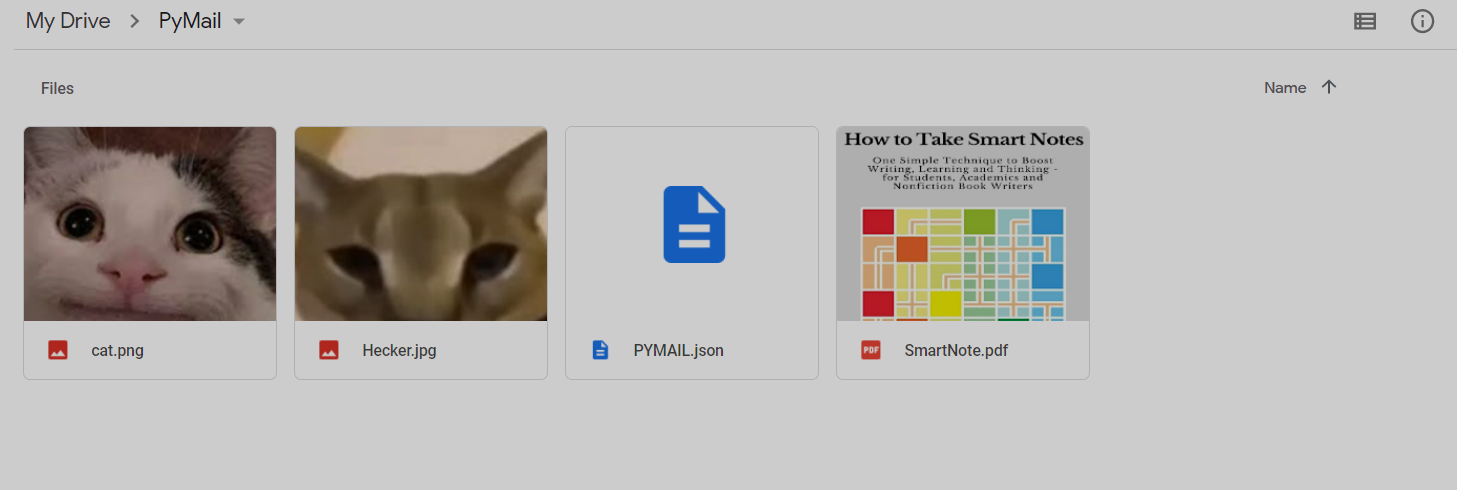

<fieldset>

ref: https://www.youtube.com/watch?v=JRCJ6RtE3xU

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import json, os

In [9]:
path = '/content/drive/MyDrive/PyMail'

In [67]:
os.chdir(path)
os.listdir()

['PYMAIL.json', 'Hecker.jpg', 'cat.png', 'SmartNote.pdf']

In [20]:
with open('PYMAIL.json') as json_file:
    PYMAIL = json.load(json_file)

EMAIL_ADDRESS = PYMAIL['EMAIL']
EMAIL_PASSWORD = PYMAIL['PASSWORD']



---



# First time 

In [27]:
import smtplib

In [41]:
#Use Gmail : smtp.gmail.com

# Option 1 : Not practical, it's unstructured

with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(EMAIL_ADDRESS, EMAIL_PASSWORD)

    subject = 'Hi Run from Colab'
    body = "Do we want to meet tonight ?"

    # Use '\n\n' to body zone
    msg = f'subject : {subject} \n\n body: {body} \n\n hey '
    smtp.sendmail(from_addr=EMAIL_ADDRESS, 
                  to_addrs=EMAIL_ADDRESS,
                  msg=msg)


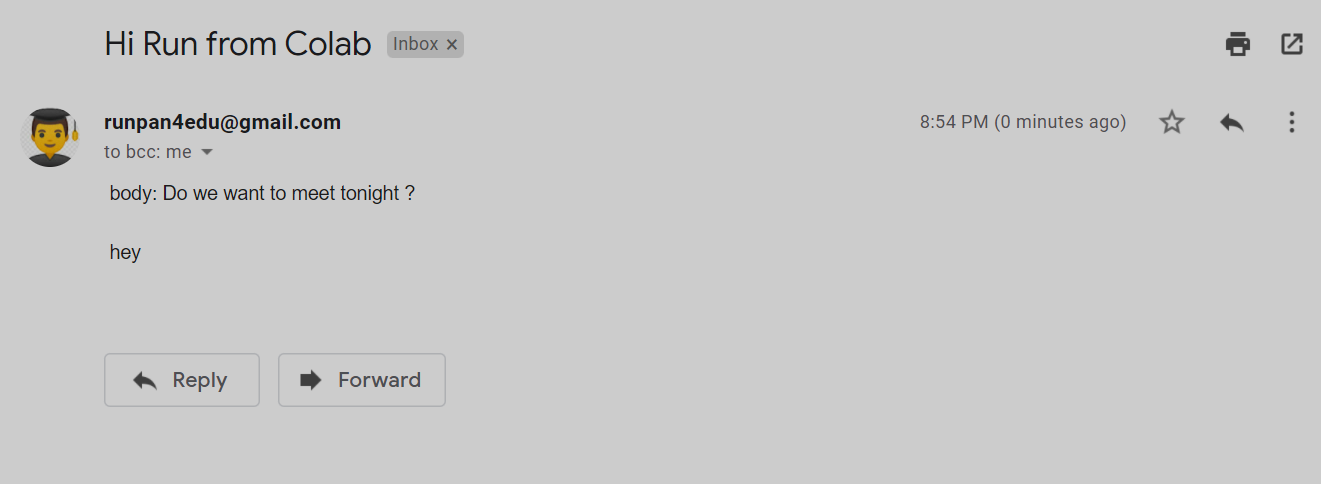



---



# Better Structure

In [ ]:
# Option2 : allow sending the email more structure using EMailMessage

In [28]:
from email.message import EmailMessage

In [35]:
msg = EmailMessage()

msg['subject'] = 'Hi Run from Colab'

msg['From'] = EMAIL_ADDRESS
msg['To'] = EMAIL_ADDRESS


msg.set_content('Do we want to meet tonight ?')

In [36]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
    smtp.send_message(msg)


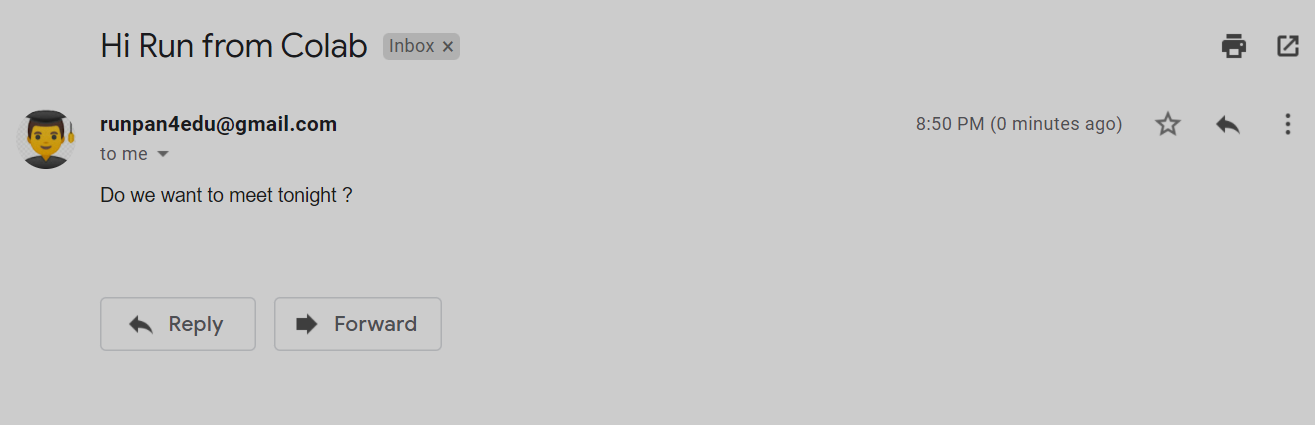



---



# Attach a single image

In [43]:
# Extend : attach (1) picture
import imghdr

In [44]:
msg = EmailMessage()

msg['subject'] = 'Hi Run from Colab'

msg['From'] = EMAIL_ADDRESS
msg['To'] = EMAIL_ADDRESS

msg.set_content('Do you know him ?')

# One image

with open('cat.png' , 'rb') as f:
  file_data = f.read()
  file_type = imghdr.what(f.name)
  file_name = f.name

msg.add_attachment(file_data, maintype='image', subtype=file_type, filename=file_name)

In [45]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
    smtp.send_message(msg)


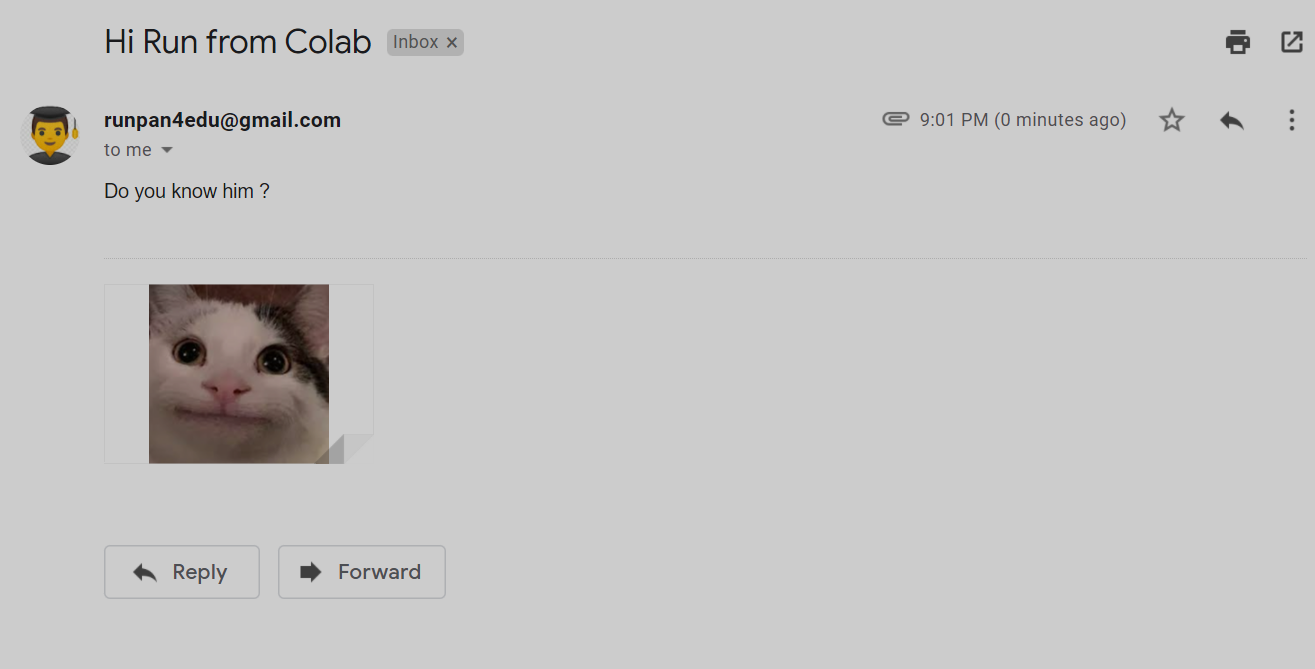



---



# Attach more than 1 image

In [ ]:
# Extend : attach (>1) picture

In [51]:
msg = EmailMessage()

msg['subject'] = 'Hi Run from Colab'

msg['From'] = EMAIL_ADDRESS
msg['To'] = EMAIL_ADDRESS

msg.set_content('Who is Beluga ?')

# 2 image

images = ['cat.png','Hecker.jpg']

for image in images:
  with open(image,'rb') as f:
    file_data = f.read()
    file_type = imghdr.what(f.name)
    file_name = f.name

  msg.add_attachment(file_data, maintype='image', subtype=file_type, filename=file_name)

In [52]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
    smtp.send_message(msg)


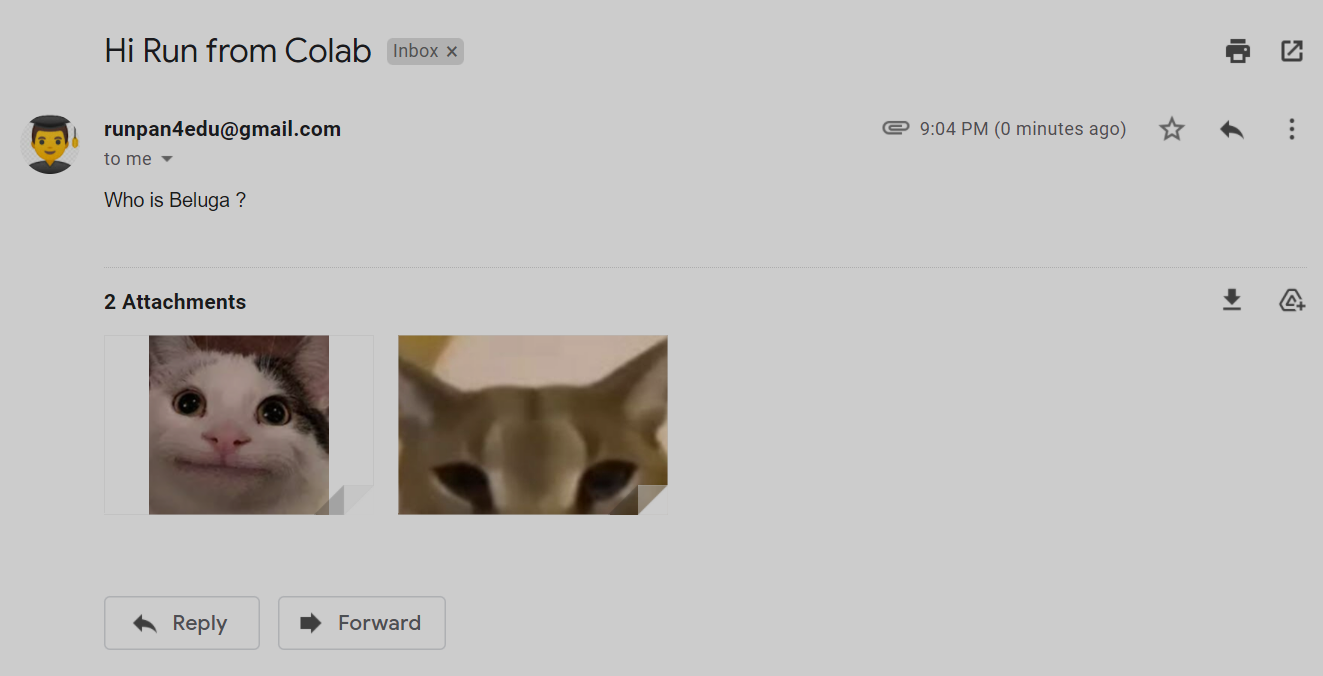



---



# Attach PDF file

In [ ]:
# Extend : attach pdf

In [55]:
msg = EmailMessage()

msg['subject'] = 'Hi Run from Colab'

msg['From'] = EMAIL_ADDRESS
msg['To'] = EMAIL_ADDRESS

msg.set_content('This is How to take smart note book')

# PDF

with open('SmartNote.pdf' , 'rb') as f:
  file_data = f.read()
  file_name = f.name

msg.add_attachment(file_data, maintype='application', subtype='octet-stream', filename=file_name)

In [56]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
    smtp.send_message(msg)


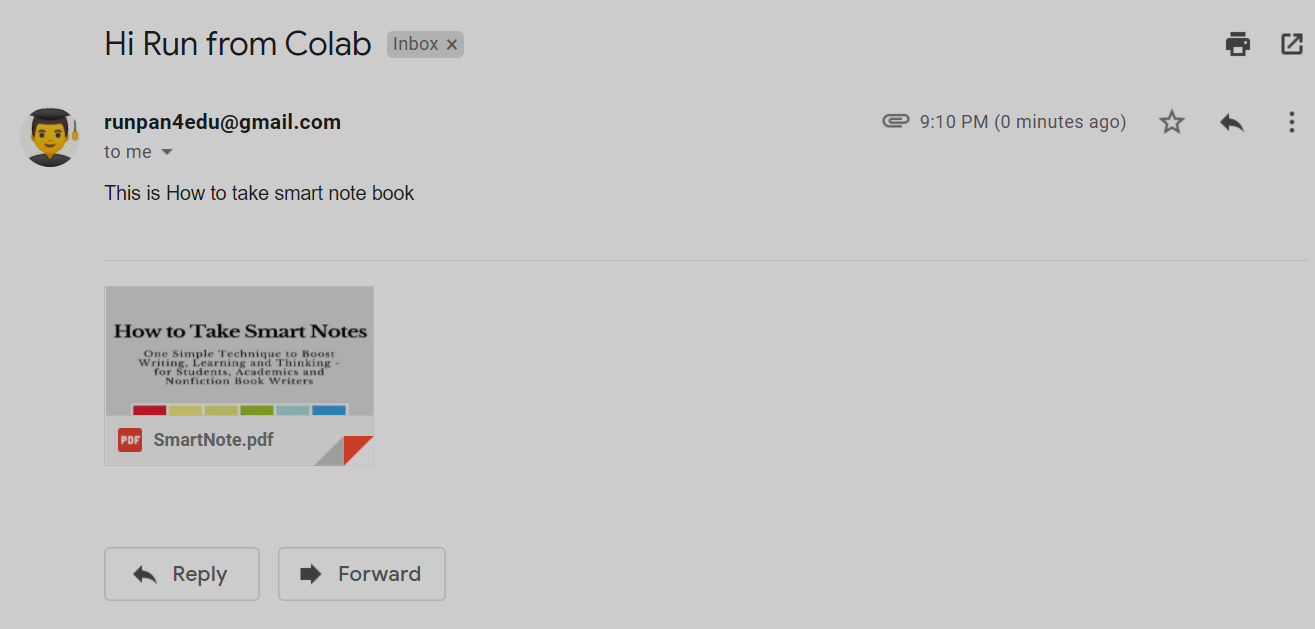



---



# Send more than 1 recipient at once

In [ ]:
# Extend : More than 1 recipient

In [58]:
'.'.join(recipients)

'runpan4edu@gmail.com.runpan4work@gmail.com'

In [63]:
msg = EmailMessage()
recipients = ['runpan4edu@gmail.com','runpan4work@gmail.com']

msg['subject'] = 'Hi Run from Colab'

msg['From'] = EMAIL_ADDRESS
msg['To'] = ', '.join(recipients)

msg.set_content('Who is him')

# One image

with open('cat.png' , 'rb') as f:
  file_data = f.read()
  file_type = imghdr.what(f.name)
  file_name = f.name

msg.add_attachment(file_data, maintype='image', subtype=file_type, filename=file_name)

In [64]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
    smtp.send_message(msg)


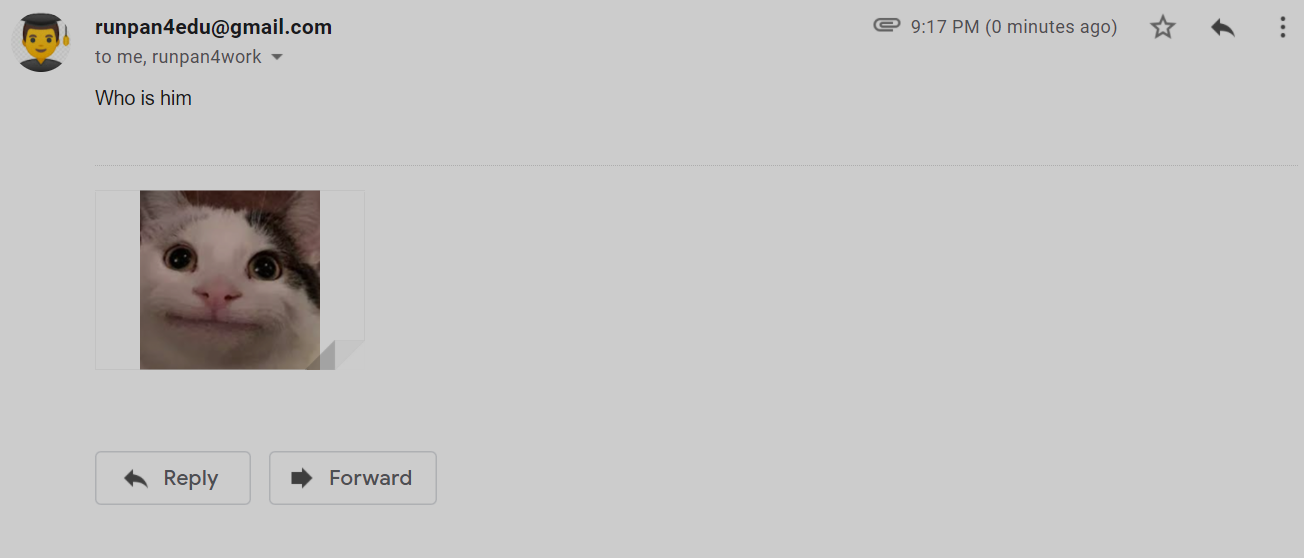



---



# Appl HTML template for your email

In [ ]:
#Extend: HTML template email

In [65]:
msg = EmailMessage()
recipients = ['runpan4edu@gmail.com','runpan4work@gmail.com']

msg['subject'] = 'Hi Run from Colab'

msg['From'] = EMAIL_ADDRESS
msg['To'] = ', '.join(recipients)

msg.set_content('Who is him')

msg.add_alternative("""\
<!DOCTYPE html>
<html>
    <body>
        <h1 style="color:SlateGray;">Who is him</h1>
    </body>
</html>
""", subtype='html')

with open('cat.png' , 'rb') as f:
  file_data = f.read()
  file_type = imghdr.what(f.name)
  file_name = f.name

msg.add_attachment(file_data, maintype='image', subtype=file_type, filename=file_name)


In [66]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
    smtp.send_message(msg)


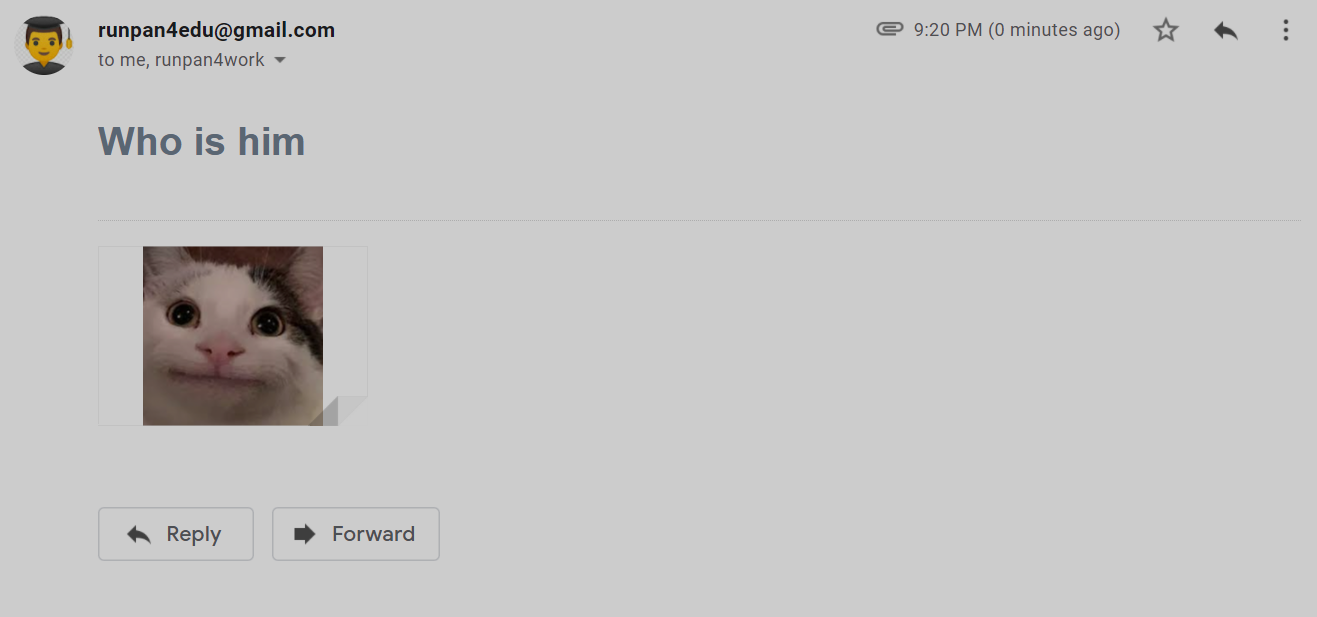